In [ ]:
!pip install numpy

In [ ]:
!pip install scikit-learn

Step 0: All points in one cluster: [[0, 1, 2, 3, 4, 5]]
Split occured! Current Clusters: [[2, 3, 4, 5], [0, 1]]

Final Result (Indices): [[2, 3, 4, 5], [0, 1]]
Final Result (Names):
  Cluster 1: ['P3', 'P4', 'P5', 'P6']
  Cluster 2: ['P1', 'P2']


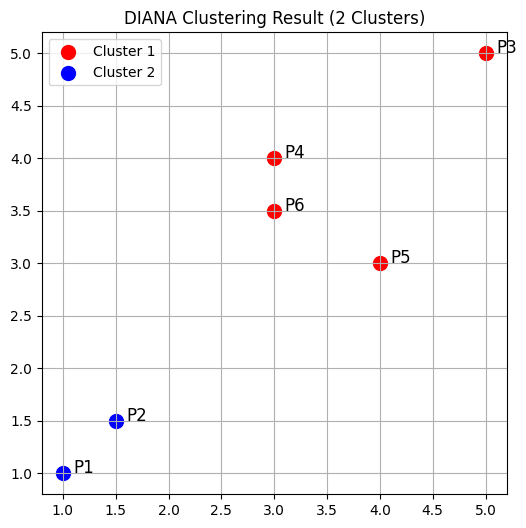

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. Setup the exact data from your file
X = np.array([[1,1],   # P1
              [1.5,1.5], # P2
              [5,5],   # P3
              [3,4],   # P4
              [4,3],   # P5
              [3,3.5]]) # P6

# Labels for readability
labels = ["P1", "P2", "P3", "P4", "P5", "P6"]

def simple_diana(data, n_clusters):
    """
    DIANA: Starts with 1 cluster and splits the widest one recursively.
    """
    # Start: All indices in one list [[0, 1, 2, 3, 4, 5]]
    clusters = [list(range(len(data)))]

    print(f"Step 0: All points in one cluster: {clusters}")

    # Loop until we have the requested number of clusters
    while len(clusters) < n_clusters:

        # A. Find the cluster with the largest spread (variance)
        max_variance = -1
        split_index = -1

        for i, cluster_indices in enumerate(clusters):
            if len(cluster_indices) < 2: continue # Cannot split a single point

            # Get the actual coordinates for points in this cluster
            cluster_data = data[cluster_indices]
            variance = np.var(cluster_data)

            if variance > max_variance:
                max_variance = variance
                split_index = i

        # B. Split that cluster into two using K-Means (k=2)
        if split_index != -1:
            indices_to_split = clusters.pop(split_index)
            data_to_split = data[indices_to_split]

            # Force K-Means to split into exactly 2 pieces
            kmeans = KMeans(n_clusters=2, n_init=10, random_state=42).fit(data_to_split)

            # Group the original indices based on the new labels (0 or 1)
            sub_group_1 = [indices_to_split[i] for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == 0]
            sub_group_2 = [indices_to_split[i] for i in range(len(kmeans.labels_)) if kmeans.labels_[i] == 1]

            clusters.append(sub_group_1)
            clusters.append(sub_group_2)

            print(f"Split occured! Current Clusters: {clusters}")

    return clusters

# --- Run the Code ---

# We want to split it until we have 2 main clusters
final_clusters_indices = simple_diana(X, n_clusters=2)

print("\nFinal Result (Indices):", final_clusters_indices)

# Print with Point Names (P1, P2...)
print("Final Result (Names):")
for i, cluster in enumerate(final_clusters_indices):
    names = [labels[idx] for idx in cluster]
    print(f"  Cluster {i+1}: {names}")

# --- Visualization ---
colors = ['red', 'blue', 'green']
plt.figure(figsize=(6, 6))

for i, cluster_indices in enumerate(final_clusters_indices):
    # Get points for this cluster
    points = X[cluster_indices]
    # Plot them
    plt.scatter(points[:, 0], points[:, 1], s=100, color=colors[i % len(colors)], label=f'Cluster {i+1}')

    # Add P1, P2 labels to the plot
    for idx in cluster_indices:
        plt.text(X[idx, 0]+0.1, X[idx, 1], labels[idx], fontsize=12)

plt.grid(True)
plt.title("DIANA Clustering Result (2 Clusters)")
plt.legend()
plt.show()